In [1]:
import numpy as np
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
from PIL import Image
import random
import cv2
from tensorflow.keras.models import Model,load_model

from tensorflow.keras import Sequential
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 

In [8]:
training_set = keras.utils.image_dataset_from_directory(
    directory="train",  
    labels="inferred",
    label_mode="categorical", 
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   )


Found 70295 files belonging to 38 classes.


In [11]:
validation_set = keras.utils.image_dataset_from_directory(
    directory="valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 17572 files belonging to 38 classes.


In [4]:
import os
import json
path_to_data = 'train'
class_names = []
for folder_name in os.listdir(path_to_data):
    if os.path.isdir(os.path.join(path_to_data, folder_name)):
        class_names.append(folder_name)
        
drug_solutions = {class_name: [] for class_name in class_names}
with open('drug_solutions.json', 'w') as json_file:
    json.dump(drug_solutions, json_file, indent=4)

print("JSON file created successfully!")






JSON file created successfully!


In [5]:
drug_solutions = {
    "Apple___Apple_scab": ["Fungicide containing myclobutanil", "Proper pruning to improve air circulation"],
    "Apple___Black_rot": ["Copper-based fungicide", "Remove infected branches and fruit"],
    "Apple___Cedar_apple_rust": ["Fungicides containing mancozeb or propiconazole", "Remove nearby cedar trees if possible"],
    "Apple___healthy": ["No treatment needed", "Regular monitoring and proper care"],
    "Blueberry___healthy": ["No treatment needed", "Mulching and regular watering"],
    "Cherry_(including_sour)___healthy": ["No treatment needed", "Maintain soil health and adequate fertilization"],
    "Cherry_(including_sour)___Powdery_mildew": ["Sulfur-based fungicide", "Ensure good air circulation"],
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": ["Fungicides with strobilurin or triazole", "Crop rotation and residue management"],
    "Corn_(maize)___Common_rust_": ["Fungicides like tebuconazole", "Resistant corn varieties"],
    "Corn_(maize)___healthy": ["No treatment needed", "Routine disease scouting"],
    "Corn_(maize)___Northern_Leaf_Blight": ["Fungicides with active ingredients like azoxystrobin", "Plant resistant hybrids"],
    "Grape___Black_rot": ["Fungicides like mancozeb or captan", "Remove mummified fruit and infected leaves"],
    "Grape___Esca_(Black_Measles)": ["Prune infected parts", "Avoid wounding vines"],
    "Grape___healthy": ["No treatment needed", "Regular vineyard maintenance"],
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)": ["Fungicides containing copper", "Improve drainage and air circulation"],
    "Orange___Haunglongbing_(Citrus_greening)": ["Manage psyllid populations with insecticides", "Remove infected trees"],
    "Peach___Bacterial_spot": ["Copper-based sprays", "Plant resistant varieties"],
    "Peach___healthy": ["No treatment needed", "Proper fertilization and watering"],
    "Pepper,_bell___Bacterial_spot": ["Copper-based fungicides", "Avoid overhead irrigation"],
    "Pepper,_bell___healthy": ["No treatment needed", "Good crop management"],
    "Potato___Early_blight": ["Chlorothalonil-based fungicides", "Practice crop rotation"],
    "Potato___healthy": ["No treatment needed", "Ensure proper soil health"],
    "Potato___Late_blight": ["Fungicides like metalaxyl", "Destroy infected plants"],
    "Raspberry___healthy": ["No treatment needed", "Proper pruning and disease monitoring"],
    "Soybean___healthy": ["No treatment needed", "Regular scouting for pests and diseases"],
    "Squash___Powdery_mildew": ["Potassium bicarbonate sprays", "Remove infected leaves"],
    "Strawberry___healthy": ["No treatment needed", "Ensure proper soil and watering practices"],
    "Strawberry___Leaf_scorch": ["Fungicides with captan", "Mulch to reduce soil splashing"],
    "Tomato___Bacterial_spot": ["Copper-based bactericides", "Avoid overhead watering"],
    "Tomato___Early_blight": ["Fungicides like chlorothalonil", "Mulch and practice crop rotation"],
    "Tomato___healthy": ["No treatment needed", "Monitor plants regularly"],
    "Tomato___Late_blight": ["Fungicides with mancozeb or chlorothalonil", "Remove and destroy infected plants"],
    "Tomato___Leaf_Mold": ["Fungicides containing copper", "Improve ventilation in greenhouses"],
    "Tomato___Septoria_leaf_spot": ["Fungicides with chlorothalonil", "Mulch to prevent soil splash"],
    "Tomato___Spider_mites Two-spotted_spider_mite": ["Miticides", "Increase humidity to reduce mite populations"],
    "Tomato___Target_Spot": ["Fungicides with boscalid", "Practice crop rotation"],
    "Tomato___Tomato_mosaic_virus": ["Remove and destroy infected plants", "Disinfect tools regularly"],
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus": ["Manage whitefly populations", "Use virus-resistant varieties"]
}


In [6]:
import json
with open('drug_solutions_with_treatments.json', 'w') as json_file:
    json.dump(drug_solutions, json_file, indent=4)
print("drug_solutions_with_treatments.json created successfully!")


drug_solutions_with_treatments.json created successfully!


Only 2 images found in the test directory and subdirectories.


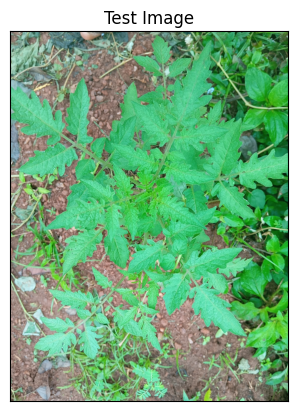

1/1 ━━━━━━━━━━━━━━━━━━━━ 141s 141s/step
Disease: Tomato___Early_blight
Suggested Treatments:
- Fungicides like chlorothalonil
- Mulch and practice crop rotation


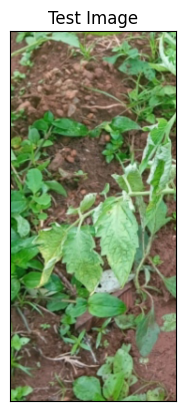

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
Disease: Tomato___Early_blight
Suggested Treatments:
- Fungicides like chlorothalonil
- Mulch and practice crop rotation


In [15]:
import tensorflow as tf
import numpy as np
import cv2
import json
import os
import random
import matplotlib.pyplot as plt
model = tf.keras.models.load_model("trained_plant_disease_model.keras")
with open('drug_solutions_with_treatments.json', 'r') as file:
    drug_solutions = json.load(file)
class_names = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy", 
               "Blueberry___healthy", "Cherry_(including_sour)___healthy", "Cherry_(including_sour)___Powdery_mildew", 
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", 
               "Corn_(maize)___healthy", "Corn_(maize)___Northern_Leaf_Blight", "Grape___Black_rot", 
               "Grape___Esca_(Black_Measles)", "Grape___healthy", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", 
               "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy", 
               "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight", 
               "Potato___healthy", "Potato___Late_blight", "Raspberry___healthy", "Soybean___healthy", 
               "Squash___Powdery_mildew", "Strawberry___healthy", "Strawberry___Leaf_scorch", 
               "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight", 
               "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite", 
               "Tomato___Target_Spot", "Tomato___Tomato_mosaic_virus", "Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

test_directory = "test"
image_files = []
for root, dirs, files in os.walk(test_directory):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

num_images = len(image_files)
if num_images < 5:
    print(f"Only {num_images} images found in the test directory and subdirectories.")
    random_images = image_files  # Use all images if there are fewer than 5
else:
    random_images = random.sample(image_files, 5)  # Otherwise, sample 5 images

def get_treatment_solution(disease_name):
    if disease_name in drug_solutions:
        return drug_solutions[disease_name]
    else:
        return ["No treatment found for this class"]

for image_path in random_images:
    # Load and display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # Display the image
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Preprocess the image for the model
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert to a batch format

    # Make a prediction
    prediction = model.predict(input_arr)
    result_index = np.argmax(prediction)  # Get the index of the highest probability
    model_prediction = class_names[result_index]  # Get the corresponding class name

    # Get the treatment solutions for the predicted disease
    solutions = get_treatment_solution(model_prediction)

    # Display the disease prediction and solutions
    print(f"Disease: {model_prediction}")
    print("Suggested Treatments:")
    for solution in solutions:
        print(f"- {solution}")


In [ ]:
That sounds like a great user experience for your mobile app! Here’s a basic outline of how to implement this feature in your mobile app:

### 1. **Image Capture and Disease Detection**
- **Capture Image**: Use the camera functionality of the mobile app to allow users to take a picture of the plant.
- **Send Image for Processing**: After capturing the image, send it to your existing plant disease detection model to get the prediction.

### 2. **Display Disease Detection Result**
- **Show Prediction**: Display the predicted disease name on the screen after the model processes the image.

### 3. **Fetch Treatment Recommendations**
- **Create a Button**: Add a button labeled something like "Show Treatment Options" or "Suggested Solutions."
- **On Button Click**: When the user clicks this button, use the disease name to look up the treatment options in your JSON file.

### 4. **Display Treatment Information**
- **Show Treatment Suggestions**: Display the relevant treatment options below the disease prediction. You can format it nicely to include:
  - Drug name
  - Dosage instructions
  - Application method

### Example Workflow in Pseudocode
Here’s a simplified pseudocode to illustrate the workflow:

```pseudo
function captureImage() {
    image = openCamera()  // Open camera and capture image
    disease_prediction = detectDisease(image)  // Call your model to get disease prediction
    display(disease_prediction)  // Show the predicted disease name
}

function showTreatmentOptions() {
    disease_name = getDiseaseName()  // Get the disease name from the displayed result
    treatment_info = lookupInJSON(disease_name)  // Fetch treatment data from JSON
    displayTreatment(treatment_info)  // Display treatment options to the user
}
```

### 5. **JSON Data Structure**
You can store your JSON data in your app’s assets or load it dynamically from a server. Here's an example structure:

```json
{
  "Powdery Mildew": {
    "treatments": [
      {"drug": "Fungicide A", "dosage": "2 ml per liter of water", "application": "weekly spray"}
    ]
  },
  "Leaf Spot": {
    "treatments": [
      {"drug": "Copper-based Fungicide", "dosage": "3 ml per liter of water", "application": "apply every 10 days"}
    ]
  }
}
```

### 6. **Framework Considerations**
Depending on the framework you are using for your mobile app (like React Native, Flutter, or native Android/iOS), you’ll have different ways to handle image capture, API calls, and JSON parsing. 

Let me know if you need specific guidance on a particular framework or more details on any of the steps!